In [2]:
import QuantLib as ql
import matplotlib.pyplot as plt

In [2]:
dates = [ql.Date(16,11,2020), ql.Date(16,12,2020), ql.Date(16,1,2021),
        ql.Date(16,4,2021), ql.Date(16,10,2021), ql.Date(16,10,2022),
        ql.Date(16,10,2023), ql.Date(16,10,2025), ql.Date(16,10,2027),
        ql.Date(16,10,2030), ql.Date(16,10,2040), ql.Date(16,10,2050)]
zeros = [0.09, 0.10, 0.11, 0.12, 0.12, 0.14, 0.18, 0.32, 0.53, 0.76, 1.30, 1.52]
curve = ql.ZeroCurve(dates, zeros, ql.ActualActual(), ql.TARGET())

In [3]:
curve.nodes()

((Date(16,11,2020), 0.09),
 (Date(16,12,2020), 0.1),
 (Date(16,1,2021), 0.11),
 (Date(16,4,2021), 0.12),
 (Date(16,10,2021), 0.12),
 (Date(16,10,2022), 0.14),
 (Date(16,10,2023), 0.18),
 (Date(16,10,2025), 0.32),
 (Date(16,10,2027), 0.53),
 (Date(16,10,2030), 0.76),
 (Date(16,10,2040), 1.3),
 (Date(16,10,2050), 1.52))

In [4]:
type(curve.nodes())

tuple

In [5]:
x = []
y = []
for dt, rate in curve.nodes():
    print(dt.to_date(), rate)
    x.append(dt.to_date())
    y.append(rate)

2020-11-16 0.09
2020-12-16 0.1
2021-01-16 0.11
2021-04-16 0.12
2021-10-16 0.12
2022-10-16 0.14
2023-10-16 0.18
2025-10-16 0.32
2027-10-16 0.53
2030-10-16 0.76
2040-10-16 1.3
2050-10-16 1.52


In [6]:
x

[datetime.date(2020, 11, 16),
 datetime.date(2020, 12, 16),
 datetime.date(2021, 1, 16),
 datetime.date(2021, 4, 16),
 datetime.date(2021, 10, 16),
 datetime.date(2022, 10, 16),
 datetime.date(2023, 10, 16),
 datetime.date(2025, 10, 16),
 datetime.date(2027, 10, 16),
 datetime.date(2030, 10, 16),
 datetime.date(2040, 10, 16),
 datetime.date(2050, 10, 16)]

In [7]:
y

[0.09, 0.1, 0.11, 0.12, 0.12, 0.14, 0.18, 0.32, 0.53, 0.76, 1.3, 1.52]

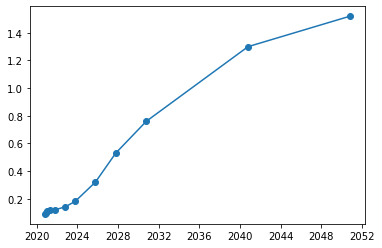

In [8]:
plt.plot(x,y,marker='o')

In [3]:
start = ql.Date(1, 6, 2020)
maturity = ql.Date(1, 3, 2022)
schedule = ql.MakeSchedule(start, maturity, ql.Period('6M'))

interest = ql.FixedRateLeg(schedule, ql.Thirty360(), [100.], [0.05])
bond = ql.Bond(0, ql.TARGET(), start, interest)

In [5]:
bond.bondYield(80, ql.Thirty360(), ql.Compounded, ql.Annual)

0.24580758885741233

In [11]:
bond.dirtyPrice(0.04, ql.Actual360(), ql.Compounded, ql.Semiannual)

101.99188452626082

In [6]:
maturity15 = ql.Date(1, 3, 2025)

In [7]:
zerobond = ql.ZeroCouponBond(0, ql.TARGET(), 100, maturity15)

In [9]:
zerobond.bondYield(90, ql.Thirty360(), ql.Compounded, ql.Annual)

0.024564140630473734

In [11]:
zerobond.dirtyPrice(0.09, ql.Actual360(), ql.Compounded, ql.Annual)

68.4257311326372